In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset (assuming you have a CSV file)
wine_data = pd.read_csv("winequalityN.csv")

#Displaing the first few rows of the dataset to understand its structure
wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [23]:
#Assuming the dataset has features (X) and target variable (y)
#Adjusting the column names accordingly based on your dataset
X = wine_data.drop("quality", axis=1)
y = wine_data["quality"]

#droping all null values :)
wine_data=wine_data.dropna()

#One-hot encode categorical variables coz we need to assign some numerical value for strings 
X = pd.get_dummies(X)

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Creating a linear regression model
model = LinearRegression()

#Training the model
model.fit(X_train,y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
X_train

Mean Squared Error: 0.5178363563772244
R-squared: 0.3464749839039607


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
459,6.1,0.43,0.35,9.1,0.059,83.0,249.0,0.99710,3.37,0.50,8.500000,False,True
1460,8.5,0.17,0.74,3.6,0.050,29.0,128.0,0.99280,3.28,0.40,12.400000,False,True
4403,5.2,0.22,0.46,6.2,0.066,41.0,187.0,0.99362,3.19,0.42,9.733333,False,True
3828,6.3,0.40,0.24,5.1,0.036,43.0,131.0,0.99186,3.24,0.44,11.300000,False,True
4317,6.7,0.34,0.26,1.9,0.038,58.0,138.0,0.98930,3.00,0.47,12.200000,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,7.9,0.21,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.900000,False,True
5219,9.3,0.61,0.26,3.4,0.090,25.0,87.0,0.99975,3.24,0.62,9.700000,True,False
5254,11.5,0.41,0.52,3.0,0.080,29.0,55.0,1.00010,3.26,0.88,11.000000,True,False
5418,9.8,0.25,0.49,2.7,0.088,15.0,33.0,0.99820,3.42,0.90,10.000000,True,False


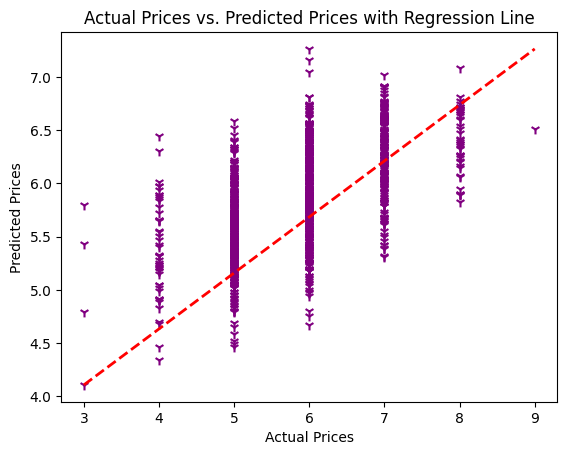

In [12]:
# Plotting the predicted vs actual values
plt.scatter(y_test, y_pred, c='purple' ,marker='1',s=50)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices with Regression Line")
plt.show()


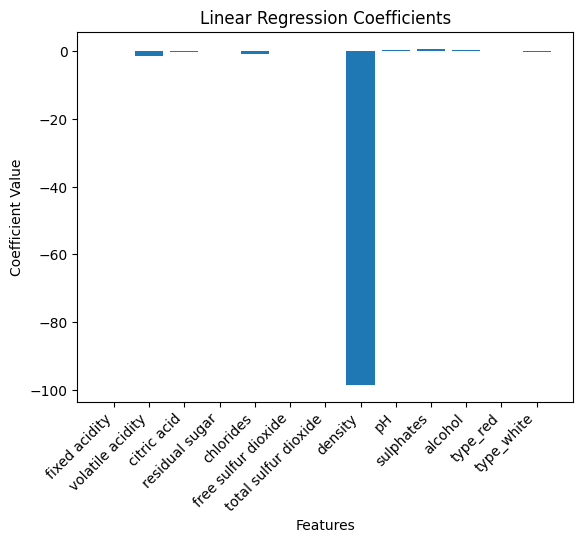

In [7]:
# Extracting coefficients from the linear regression model
coefficients = model.coef_

# Creating a bar plot of coefficients
plt.bar(X.columns, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.xticks(rotation=45, ha='right')
plt.show()


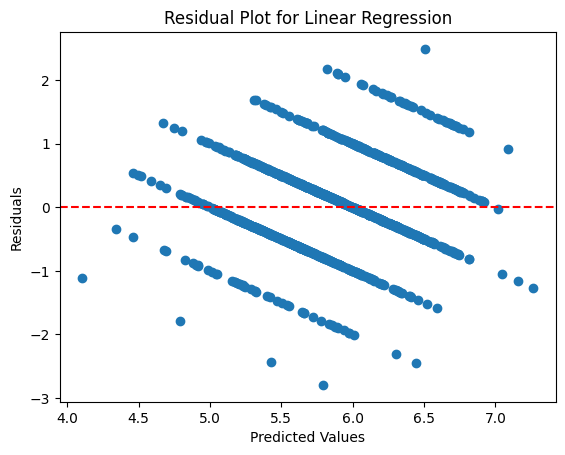

In [13]:
# Calculating residuals
residuals = y_test - y_pred

# Creating a residual plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()

#A residual plot shows the difference between the actual and predicted values

In [25]:
# Example new data with feature values for prediction
new_data = pd.DataFrame({    
    'fixed acidity': [7.2],
    'volatile acidity': [0.25],
    'citric acid': [0.32],
    'residual sugar': [8.5],
    'chlorides': [0.045],
    'free sulfur dioxide': [30],
    'total sulfur dioxide': [120],
    'density': [0.995],
    'pH': [3.2],
    'sulphates': [0.5],
    'alcohol': [10.5],
    'type_red' : [False],
    'type_white' :[True]
})

# Use the trained model to make predictions on the new data
predicted_quality = model.predict(new_data)

# Display the predicted quality
print("Predicted Quality:", predicted_quality)


Predicted Quality: [5.98902586]
